# Predict Survival of Patients with Heart Failure from the Patient's Medical Records

### Group Members: Sharon Marfatia, Lawrence Ma, Gabriel Ieong

### Introduction:
Cardiovascular diseases (CVD) cause approximately 17 million deaths worldwide every year. Heart failure is a common type of CVD, and it occurs when the heart is unable to pump sufficient blood to meet the body’s needs. This analysis will use machine learning to investigate a crucial predictive question - **will a patient with heart failure survive, and what medical factors predict such an outcome?** The data set that will be used to answer this question contains the medical records (EHRs) of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and Allied Hospital.



|Variables|Description|
|---------|-----------|
|Age (Integer)|Range from 40 – 95 years old|
|Anaemia (Boolean)|Lack of hemoglobin or red blood cells|
|High Blood Pressure (Boolean)|Force of blood against artery walls|
|Creatinine phosphokinase (mcg/L)|Amount of CPK enzyme in the blood|
|Diabetes (Boolean)|Lack of insulin|
|Ejection Fraction (%)|Blood pumped from the heart during a single contraction|
|Sex (Boolean)|Female or male|
|Platelets (kiloplatelets/mL)|Amount of platelets (cells which help blood clots)|
|Serum creatinine (mg/dL)|Level of creatinine in the blood|
|Serum sodium (mEq/L)|Level of sodium in the blood|
|Smoking (Boolean)|Whether patient smokes|
|Time (Integer)|Clinic follow-up in days|
|Death event (Boolean)|Died during follow-up period|

<b><center> Table 1.0: Dataset variables and their definitions </center></b>

In [1]:
# The packages we need to load are tidyverse, repr, tidymodels, ggplot2, and GGally. We have done so below.
library(tidyverse)
library(repr)
library(tidymodels)
library("ggplot2")
library("GGally")
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

**Loading Data from UCI Machine Learning Repository**

We have used the URL that contains the data and directly read it using the read_csv() function below. We have not stored the data locally. The set.seed() function is used to make our analysis and results reproducible. We only intialize the seed once in the report. 

In [2]:
set.seed(400)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
heart_failure <- read_csv(url)
heart_failure


Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


<b><center> Table 2.0: The raw dataset </center></b>

**Cleaning Data**

We converted the default **double** data types of categorical variables into **factors** in order to conduct classification analysis. Upon inspecting this data set in Excel, we confirmed that each row is a single observation, each column is a single variable, and each value is a single cell, making this a tidy data set. 

In [3]:
# The boolean variables have been converted into factors using the as_factor(), and then the values corresponding to 0 have
# been changed to "no," and values corresponding to 1 have been changed to "yes" to display factors in a human-readable
# format.

heart_failure <- heart_failure %>%
            mutate(anaemia = as_factor(anaemia),
                   diabetes = as_factor(diabetes),
                   sex = as_factor(sex),
                   high_blood_pressure = as_factor(high_blood_pressure),
                   smoking = as_factor(smoking),
                   DEATH_EVENT = as_factor(DEATH_EVENT))

levels(heart_failure$anaemia) <- c("no", "yes")
levels(heart_failure$diabetes) <- c("no", "yes")
levels(heart_failure$sex) <- c("female", "male")
levels(heart_failure$high_blood_pressure) <- c("no", "yes")
levels(heart_failure$smoking) <- c("no", "yes")
levels(heart_failure$DEATH_EVENT) <- c("no", "yes")



heart_failure

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


<b><center> Table 3.0: The cleaned dataset with type conversions </center></b>

**Dataset Partitioning**

We split the dataset into a training set containing 85% of the data and the remaining 15% into a testing set.
The data is split so that 85% of the data is used to train the model, and 15% of the data is used to test the model. The reason behind this is that after studying prior models made by domain experts with this data set, the prediction model was most accurate when using 85% of the data for training and 15% for testing. 

In [4]:
# The training set is used to teach the classifier, and the training set is used to find the accuracy of the classifier's
# predictions when the true labels of the data set are unknown. This process validates that the classifier can correctly
# predict values and is not just memorizing results.

heart_failure_split <- initial_split(heart_failure, prop = 0.85, strata = DEATH_EVENT)
heart_failure_train <- training(heart_failure_split)
heart_failure_test <- testing(heart_failure_split)

heart_failure_train

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
65,yes,160,yes,20,no,327000,2.7,116,female,no,8,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


<b><center> Table 4.0: The training set containing 255 rows out of 299 (85%) </center></b>

In [5]:
# To see the NA values in the training data set, we used the is.na(), and using the sum function sum(), we got the number 
# of NA values in the data set. Since the sum is 0, there are no missing values in the data set. 

sum(is.na(heart_failure_train))

[1] 0

**Exploratory Analysis (Classes)**

We check for sufficient class balance to avoid future deficiencies with our analysis. Based on the table below, there are 173 survivors (67.84%) and 82 deaths (32.16%) in the training set. Class balance appears to be satisfied so that any single class is not significantly outnumbered by the other, and therefore upsampling is not required.

In [6]:
# The table below shows that in the training set there are 173 survivors (67.84%) and 82 deaths (32.16%).
summarized_train <- heart_failure_train %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentage = (n * 100)/nrow(heart_failure_train))

summarized_train

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentage
<fct>,<int>,<dbl>
no,173,67.84314
yes,82,32.15686


<b><center> Table 5.0: Death amounts and corresponding percentage of dataset </center></b>

<b><center> Analysis process for selecting predictor variables </center></b>

**Visualizations** 

From the ggpairs scatter plot matrix below, the scatter plots between serum creatinine, ejection fraction, and time display the clearest separation between the two labels of the DEATH_EVENT column. We can also visualize this from the variable distribution graphs displayed diagonally. There seems to be more orange dots(patients that survived) when the serum creatinine levels are low, the ejection fraction levels are high, and the clinical follow-up time is longer. There are more turquoise dots (patients died) when the serum creatinine levels are high, the ejection fraction levels are low, and the clinical follow-up time is shorter. 

We decide not to use variables such as creatinine_phosphokinase and serum_sodium because the scatter 
plots with these variables do not show identifiable separate groups of orange dots and turquoise dots where we can
distinctively say whether a low or high level of that variable will cause death. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



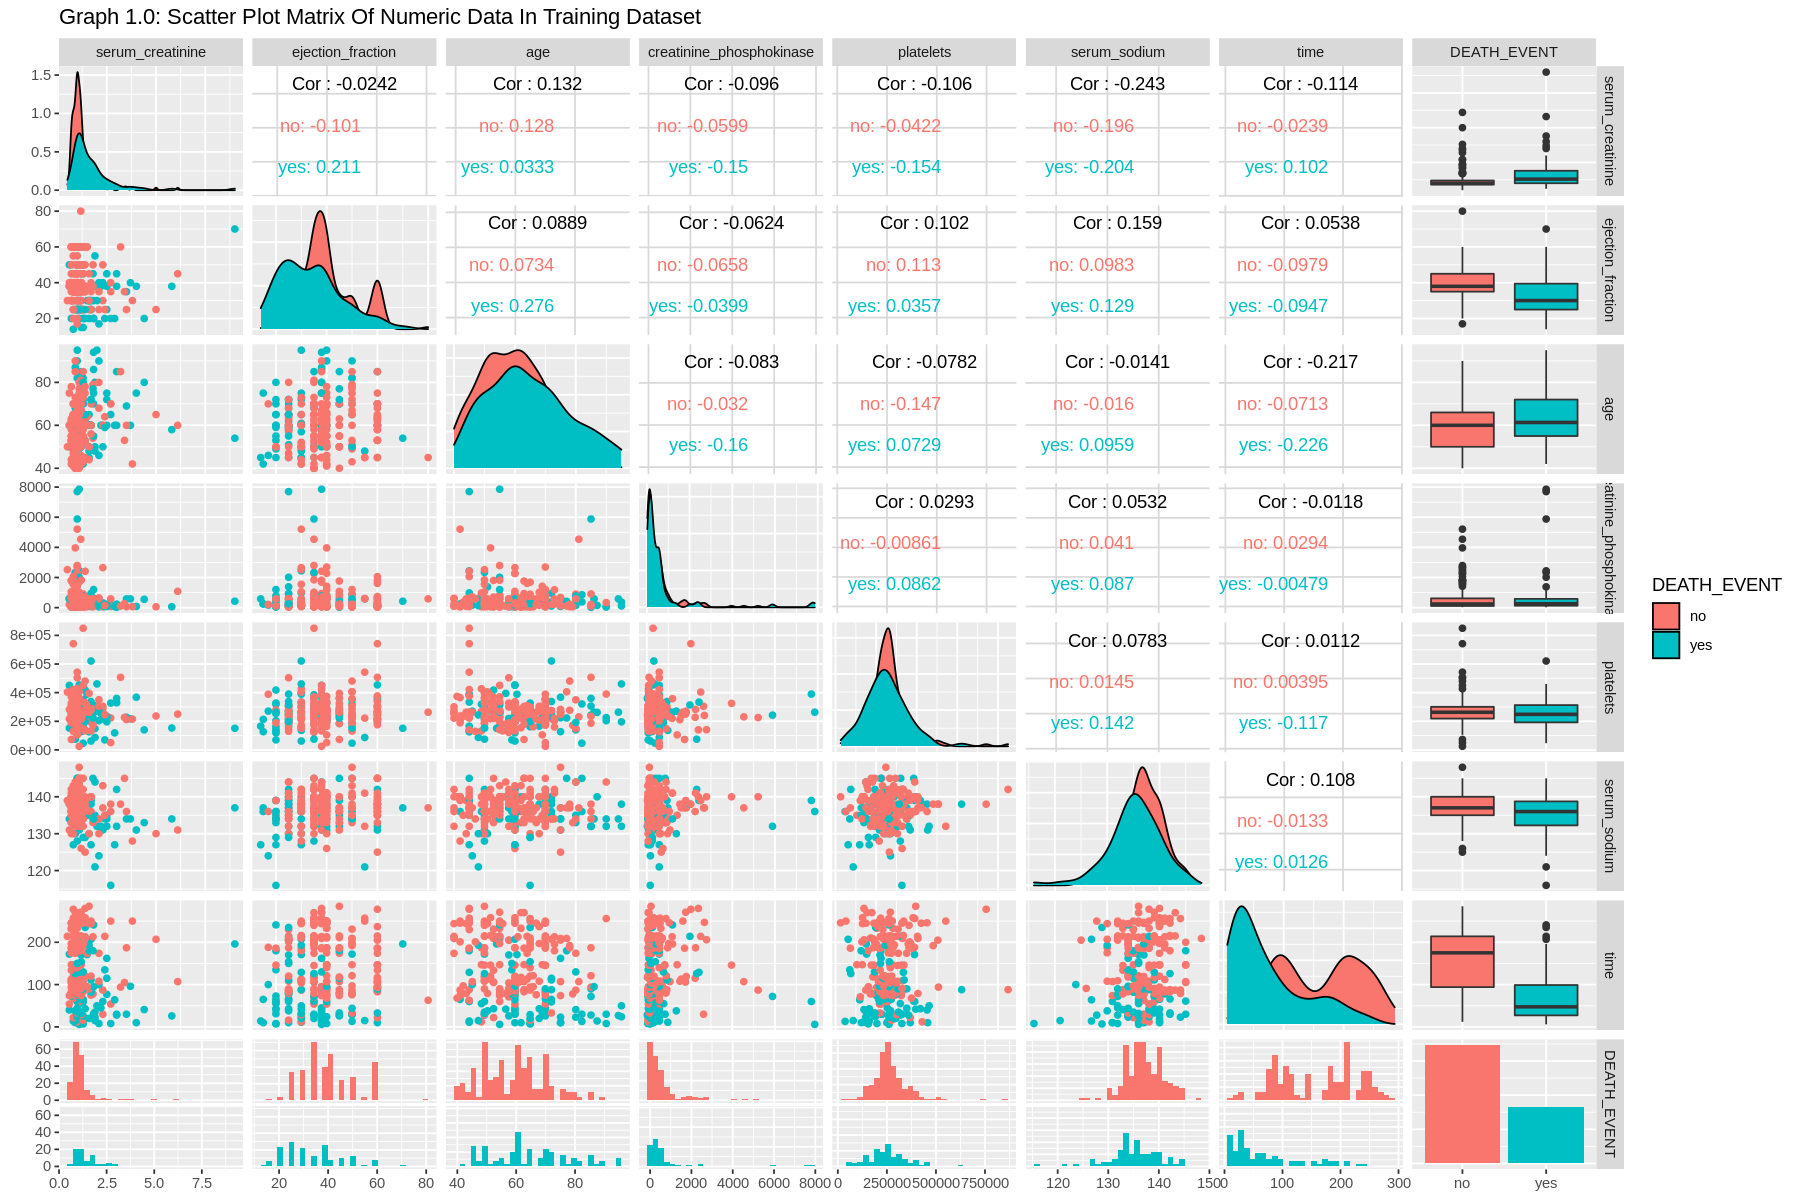

In [7]:
# Visualizations

# ggpairs scatter plot matrix

# To observe which variables could be the most useful predictors from this data set, we use ggpairs to build a scatter 
# plot matrix of all numeric variables in our data set. To do this, we are using the GGally and ggplot2 packages. In this
# matrix, each pair of numeric pairs are drawn with scatter plots, and for the DEATH_EVENT column, they are drawn with bar 
# plots. Variable distribution is displayed diagonally. The Pearson correlation is displayed on the right of the scatter 
# plots. 

# Prior domain experts that have used this data set to create their prediction model also indicated in their research that 
# serum creatinine, ejection fraction, and time were the most relevant medical features out of all the variables in the 
# data set to predict the death outcome.

options(repr.plot.width = 15, repr.plot.height = 10)

heart_failure_select <- heart_failure_train %>% 
                        select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
                               serum_sodium, time, DEATH_EVENT)

ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT),
        title = "Graph 1.0: Scatter Plot Matrix Of Numeric Data In Training Dataset",
        legend = 1)


<b><center> Graph 1.0: ggpairs Scatter Plot Matrix of potential predictor variables </center></b>

**Forward Selection**

We perform forward selection to select a set of predictor variables from the dataset that gives the highest accuracy of predictions for the training data set. We avoid superfluous variables as they can obfuscate the significant contributors to our classification and can detract from the accuracy of our knn-classifier. 


In [8]:

# We create a subset of variables that contain numerical values and the target variable: DEATH_EVENT. 

# heart_failure_subset <- heart_failure %>%
#   select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
#          serum_sodium, time, DEATH_EVENT)


# The names of the columns except for the DEATH_EVENT column. 

# names <- colnames(heart_failure_subset %>% select(-DEATH_EVENT))

# heart_failure_subset

# # create an empty tibble to store the accuracy results
# accuracies <- tibble(size = integer(), 
#                      model_string = character(), 
#                      accuracy = numeric())

# # create a model specification
# knn_spec <- nearest_neighbor(weight_func = "rectangular", 
#                              neighbors = tune()) %>%
#      set_engine("kknn") %>%
#      set_mode("classification")

# # create a 5-fold cross-validation object
# heart_failure_vfold <- vfold_cv(heart_failure_subset, v = 5, strata = DEATH_EVENT)

# # store the total number of predictors
# n_total <- length(names)

# # stores selected predictors
# selected <- c()

# #for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
#     # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("DEATH_EVENT", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         heart_failure_recipe <- recipe(as.formula(model_string), 
#                                 data = heart_failure_subset) %>%
#                           step_scale(all_predictors()) %>%
#                           step_center(all_predictors())

#         # tune the KNN classifier with these predictors, 
#         # and collect the accuracy for the best K
#         acc <- workflow() %>%
#           add_recipe(heart_failure_recipe) %>%
#           add_model(knn_spec) %>%
#           tune_grid(resamples = heart_failure_vfold, grid = 10) %>%
#           collect_metrics() %>%
#           filter(.metric == "accuracy") %>%
#           summarize(mx = max(mean))
#         acc <- acc$mx %>% unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies %>% 
#       add_row(size = i, 
#               model_string = models[[jstar]], 
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
# accuracies

In [9]:
# accuracies %>%
#         arrange(accuracy) %>%
#         tail()

<b><center> Table 6.0: Predictor Variable Subsets and their accuracy in descending order </center></b>

In [10]:
# accuaracies_predictors <- accuracies %>%
#                             ggplot(aes(x = size, y = accuracy)) +
#                             geom_point() +
#                             geom_line() +
#                             labs(x = "The number of predictors", y = "Estimated Accuracy") +
#                             theme(text = element_text(size = 20)) +
#                             ggtitle("Graph 2.0: The relationship between the estimated accuracy and the 
#                                     number of predictors") +
#                             theme(plot.title = element_text(hjust = 0.5, size = 20))
# accuracies_predictors

<b><center> Graph 2.0: Graph of the number of predictors and estimated accuracy </center></b>

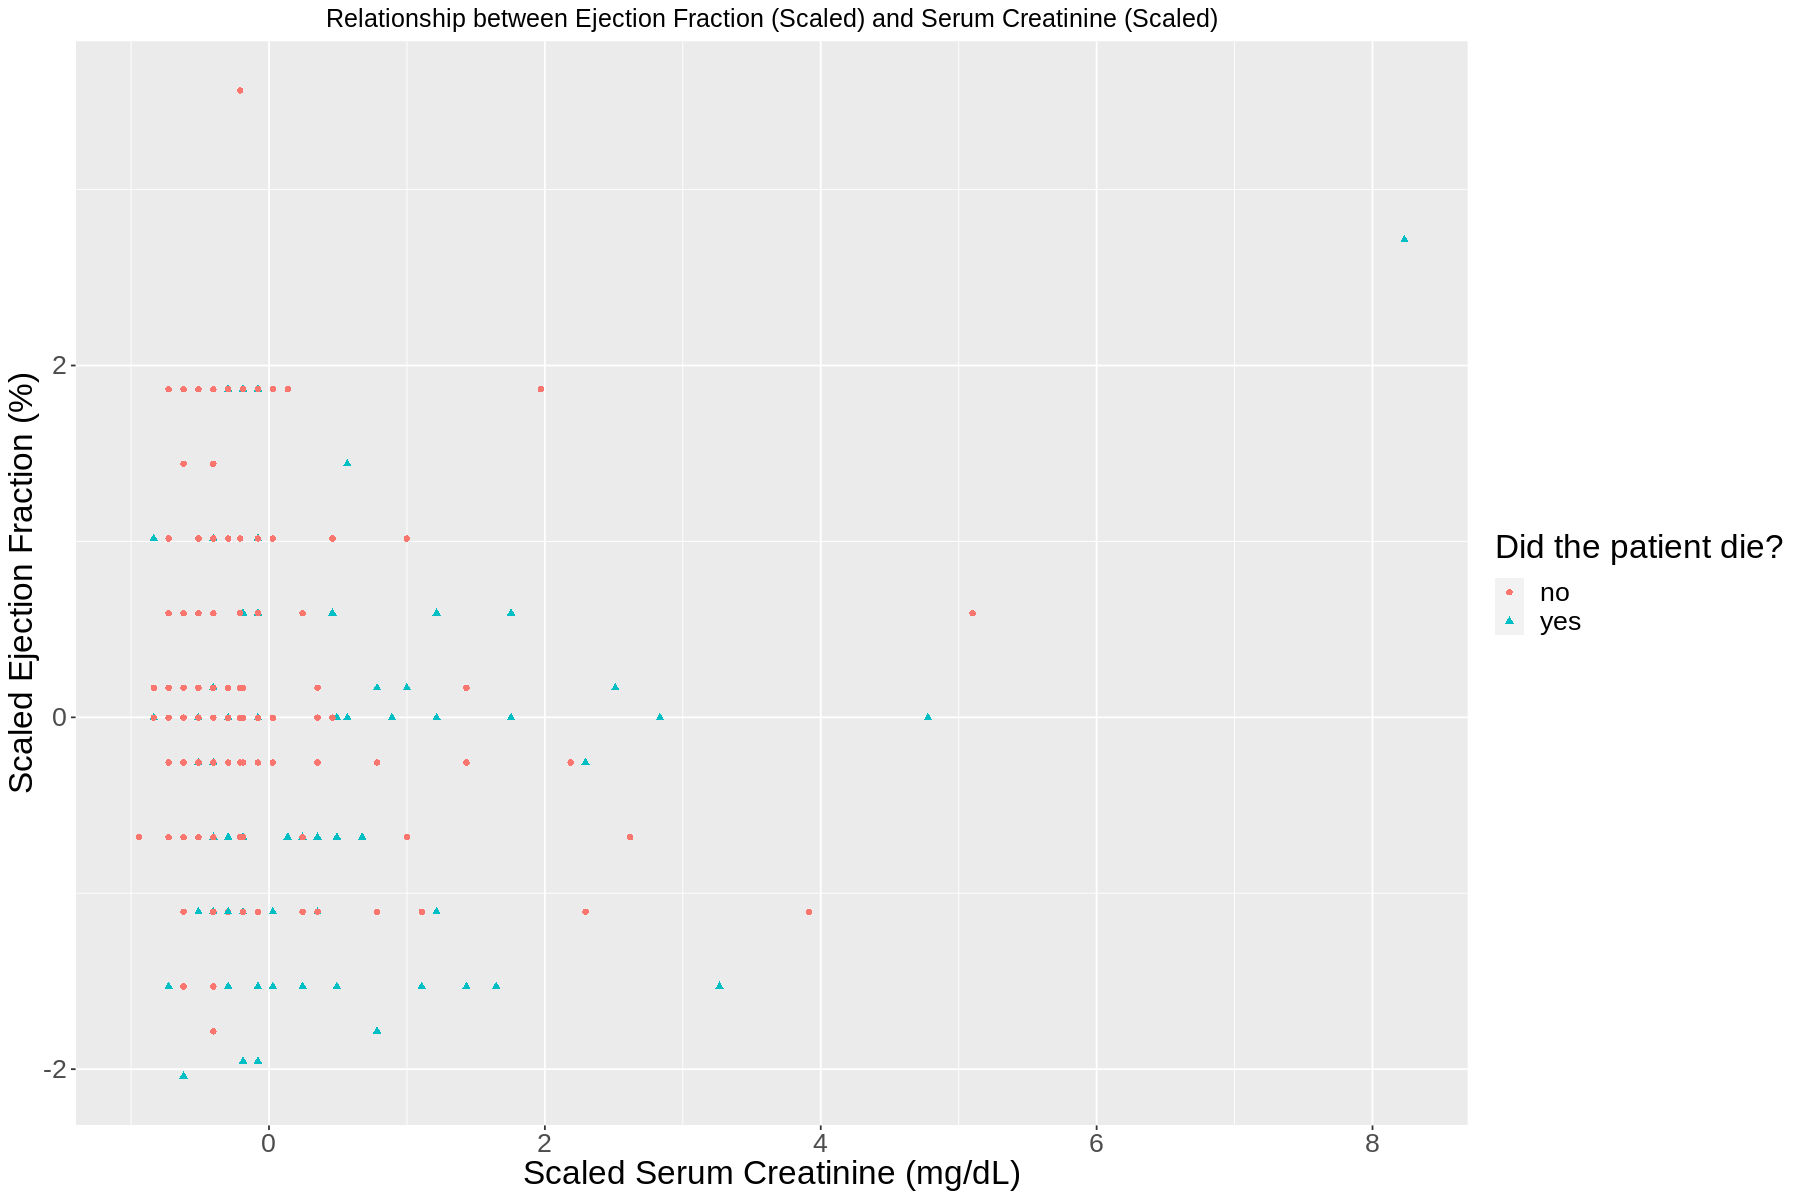

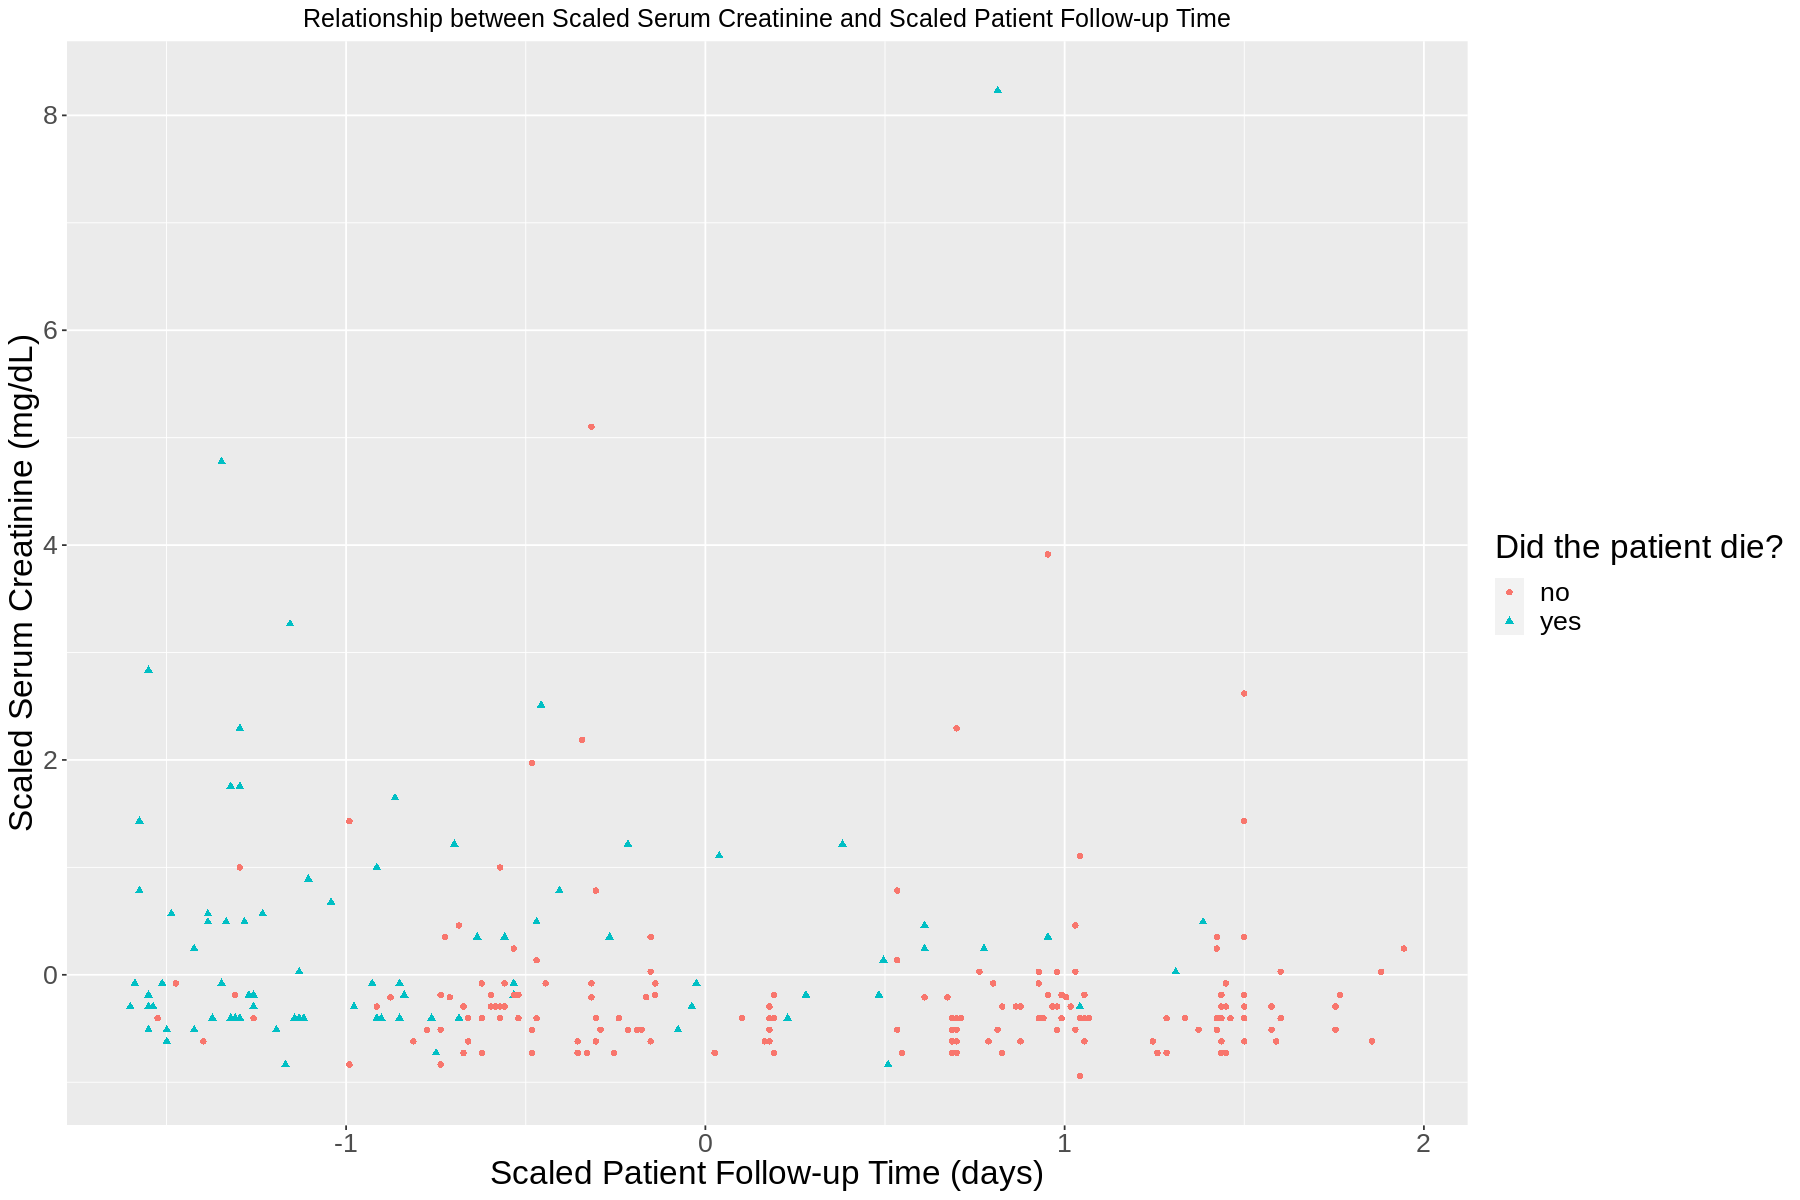

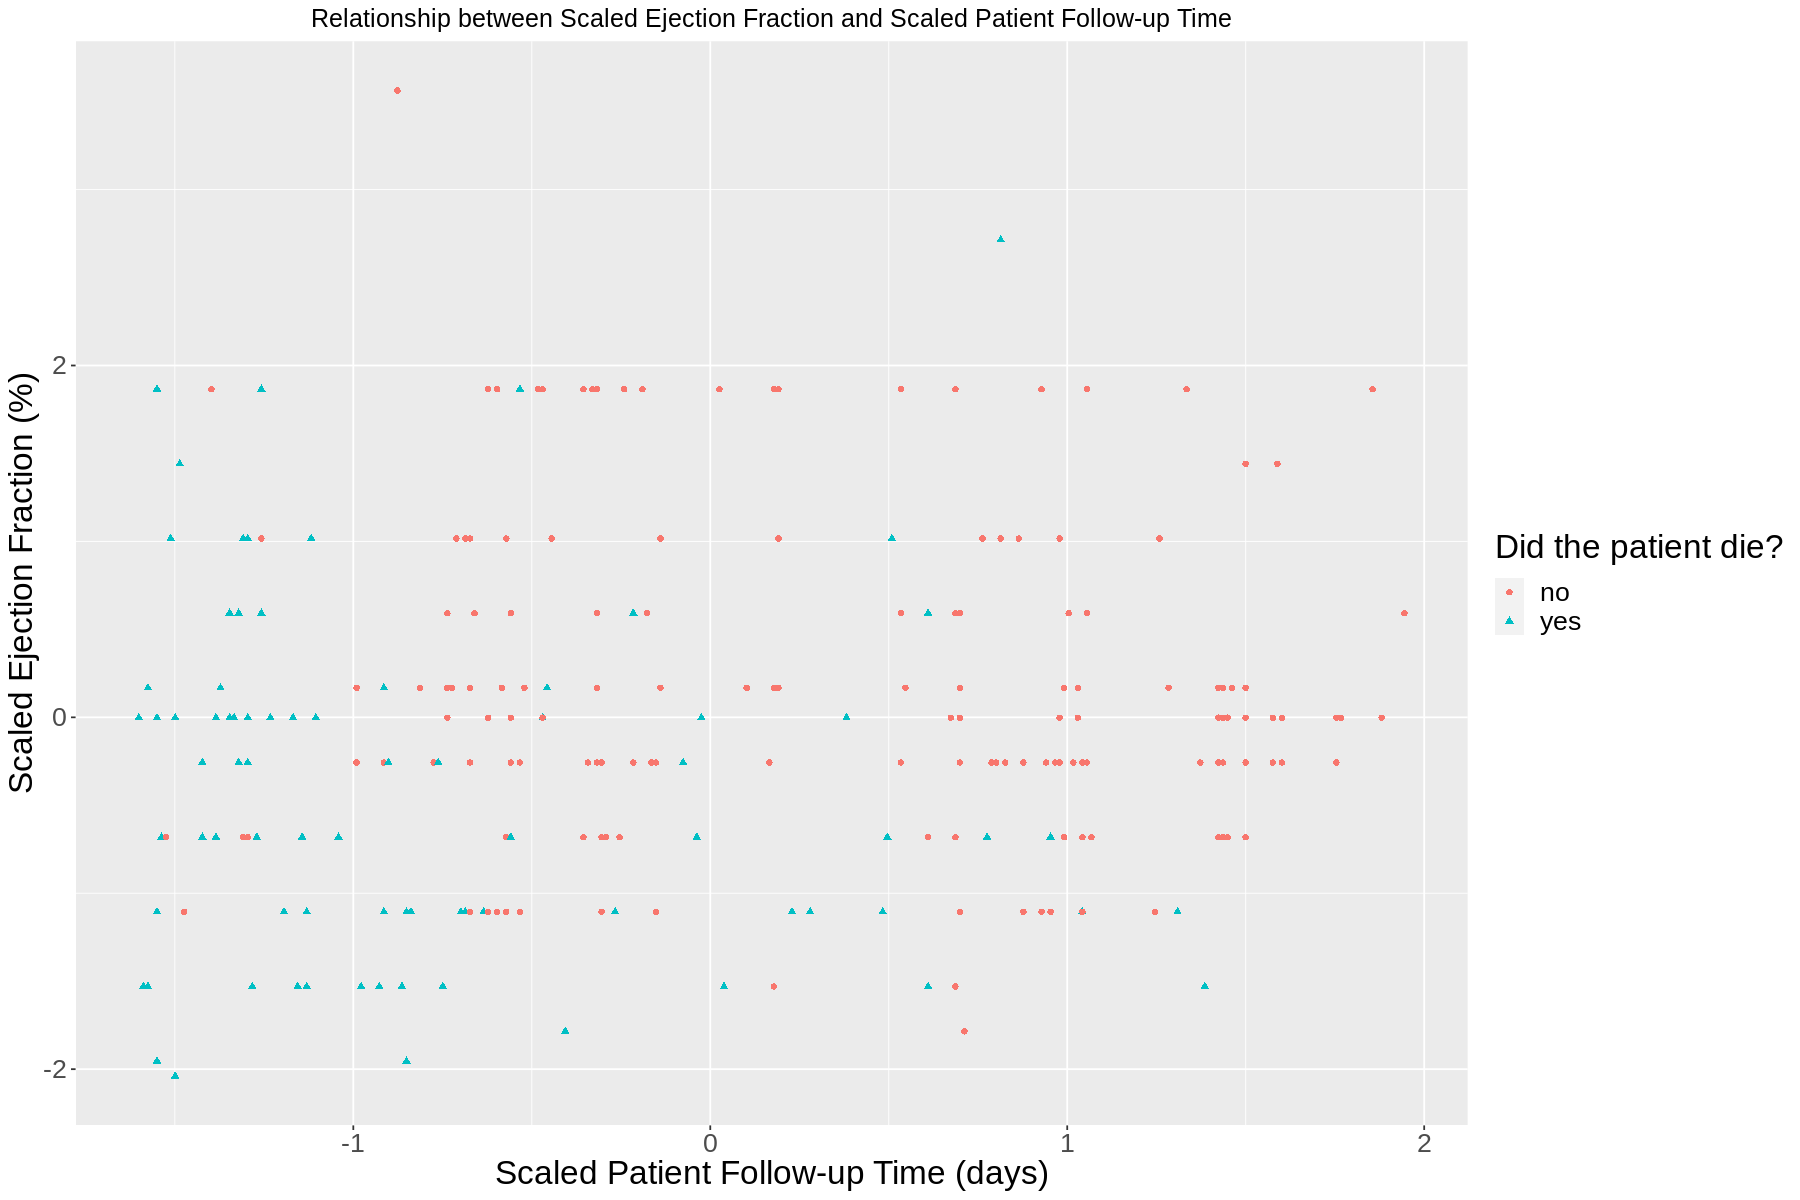

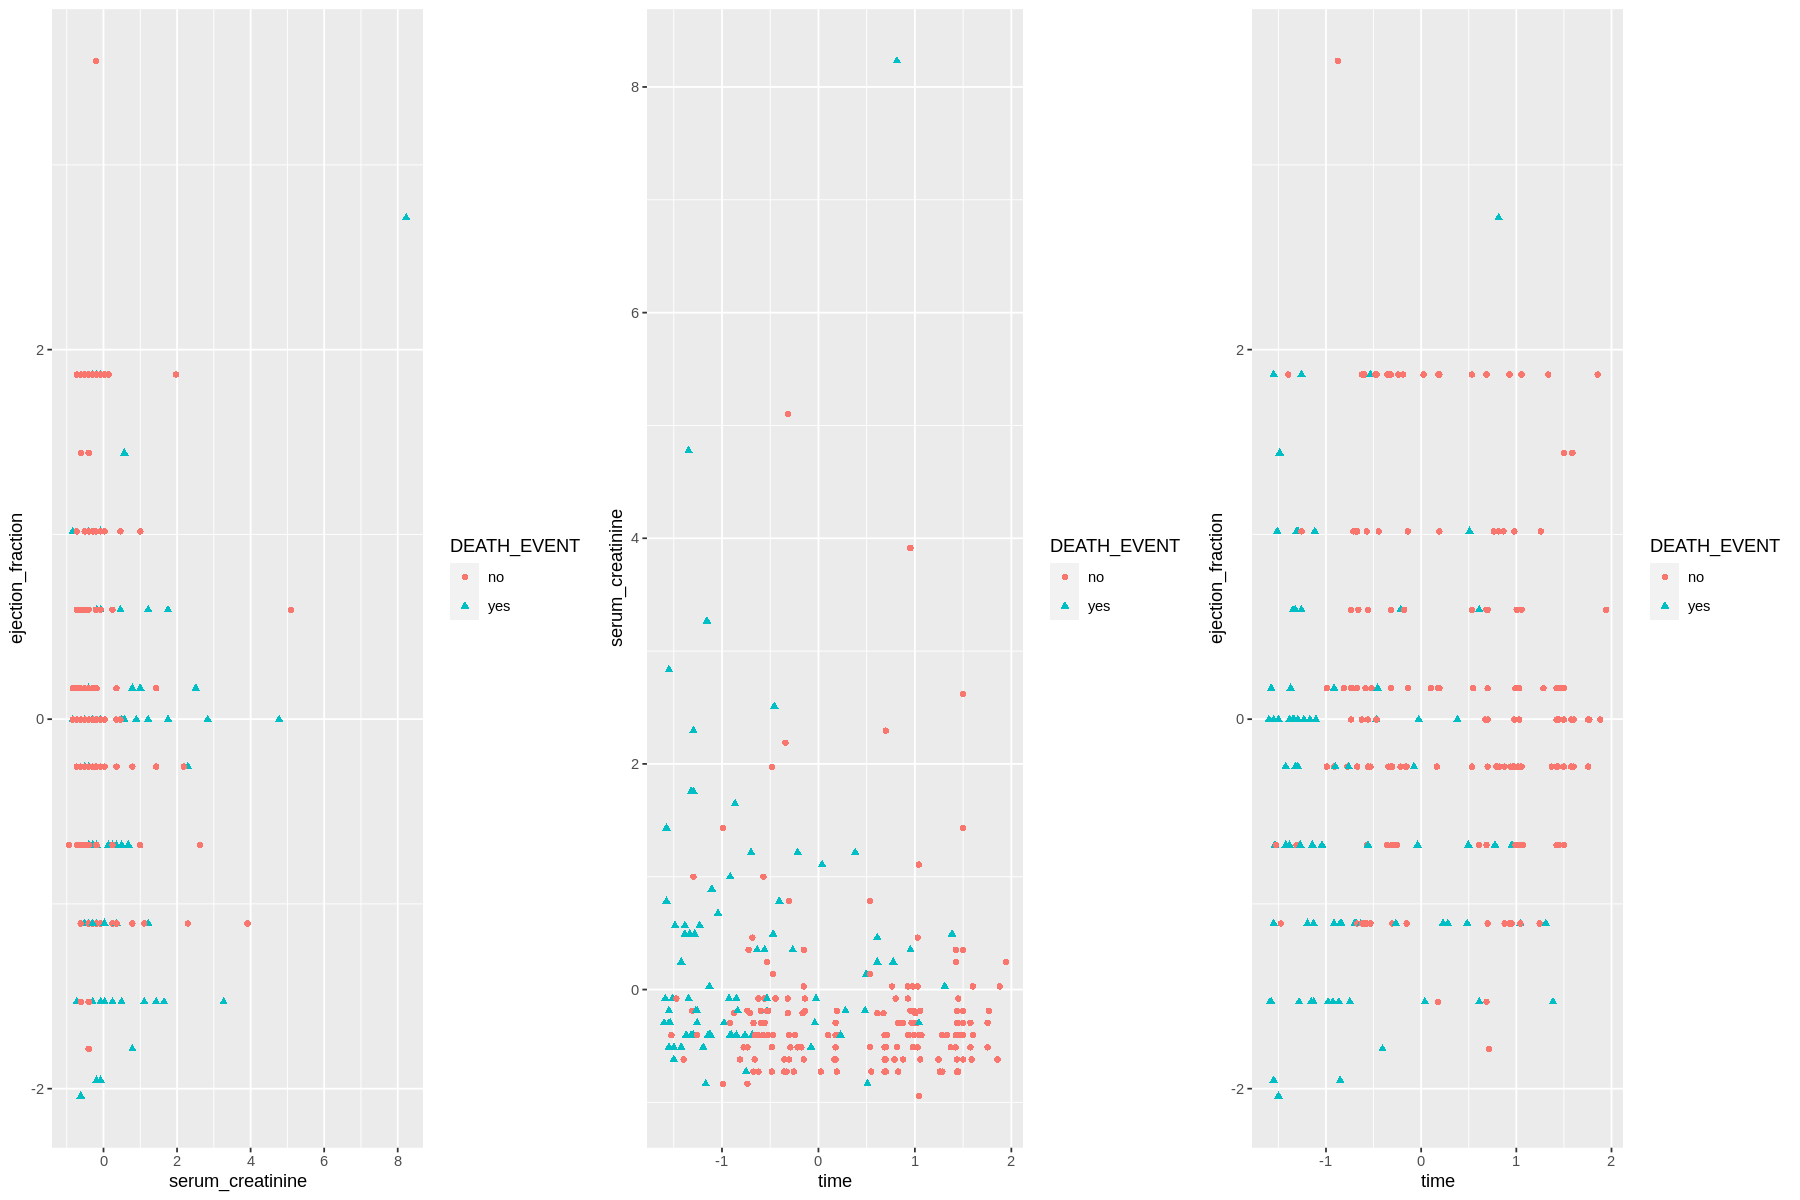

In [11]:
# We have scaled the scatter plot for ejection fraction and serum creatinine to correct skewness towards large values that
# could dominate distance calculations. 

heart_failure_recipe <- recipe(DEATH_EVENT ~ time + serum_creatinine + ejection_fraction, data = heart_failure_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors()) %>%
                        prep()

scaled_heart_failure <- bake(heart_failure_recipe, heart_failure_train)
ej_vs_se <- ggplot(scaled_heart_failure, aes(x = serum_creatinine, y = ejection_fraction, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point() +
                    labs(x = "Scaled Serum Creatinine (mg/dL)", y = "Scaled Ejection Fraction (%)", 
                         colour = "Did the patient die?",
                    shape = "Did the patient die?") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Relationship between Ejection Fraction (Scaled) and Serum Creatinine (Scaled)") +
                    theme(plot.title = element_text(hjust = 0.5, size = 15))
ej_vs_se

se_vs_ti <- ggplot(scaled_heart_failure, aes(x = time, y = serum_creatinine, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point() +
                    labs(x = "Scaled Patient Follow-up Time (days)", y = "Scaled Serum Creatinine (mg/dL)", 
                         colour = "Did the patient die?",
                    shape = "Did the patient die?") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Relationship between Scaled Serum Creatinine and Scaled Patient Follow-up Time") +
                    theme(plot.title = element_text(hjust = 0.5, size = 15))
se_vs_ti

ej_vs_ti <- ggplot(scaled_heart_failure, aes(x = time, y = ejection_fraction, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point() +
                    labs(x = "Scaled Patient Follow-up Time (days)", y = "Scaled Ejection Fraction (%)", 
                         colour = "Did the patient die?",
                    shape = "Did the patient die?") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Relationship between Scaled Ejection Fraction and Scaled Patient Follow-up Time") +
                    theme(plot.title = element_text(hjust = 0.5, size = 15))
ej_vs_ti


one <- ggplot(scaled_heart_failure, aes(x = serum_creatinine, y = ejection_fraction, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point()

two <- ggplot(scaled_heart_failure, aes(x = time, y = serum_creatinine, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point() 

three <- ggplot(scaled_heart_failure, aes(x = time, y = ejection_fraction, colour = DEATH_EVENT,
                                                  shape = DEATH_EVENT)) +
                    geom_point() 



options(repr.plot.width = 15, repr.height = 10)

title <- ggdraw() + 
  draw_label("Graph 3.0: Scatter Plots of the 3 Predictors - time, ejection fraction, and serum creatinine")

combined_plot <- plot_grid(one, two, three, ncol = 3)
combined_plot

<b><center> Graph 3.0: Scatter plots of the predictors </center></b>

Below is a table of the means of our predictor variables. From this table, we can analyze that, on average, people who
had an ejection fraction of approximately 34%, serum creatinine of approximately 1.73 mg/dL, and clinical follow-up time
of 73 days died.

In [12]:
means_data <- heart_failure_train %>%
              group_by(DEATH_EVENT) %>%
              summarize(ejection_fraction_average = mean(ejection_fraction),
                       serum_creatinine_average = mean(serum_creatinine),
                       time_average = mean(time))

means_data

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,ejection_fraction_average,serum_creatinine_average,time_average
<fct>,<dbl>,<dbl>,<dbl>
no,40.09827,1.207052,160.15029
yes,33.65854,1.726220,72.52439


<b><center> Table 7.0: Means of the selected predictor variables </center></b>

<b><center> KNN Classification Model </center></b>

**Cross Validation**

Our KNN-classifier's accuracy will vary depending on which value of the parameter k (# of nearest-neighbors) we choose.
We utilize cross-validation to select the best value of k to ensure optimal accuracy in our subsequent analysis.

We are using 5-fold validation (v = 5).

In [13]:
# We can evaluate the accuracy of candidate classifiers without touching the testing set by using the validation folds. An
# average accuracy among folds also ensures we avoid high/low accuracies by pure chance when splitting the dataset.

heart_failure_vfold <- vfold_cv(heart_failure_train, v = 5, strata = DEATH_EVENT)

Instead of a given k-value, we are tuning every parameter in the model by specifying tune () in the model specification so that we can select an optimum K value.

In [14]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

We scale and center all our predictor variable values. 

In [15]:
# Standardizing data ensures every variable can contribute evenly to the classification and that its individual 
# measurement scale doesn't interfere with the nearest-neighbor distance calculations. For instance, an unscaled dataset 
# would see a change of mass of 100g on variable A as a further distance that a change of 1kg on variable B which 
# intuitively would be wrong. 

heart_failure_recipe <- recipe(DEATH_EVENT ~ time + ejection_fraction + serum_creatinine,
                               data = heart_failure_train) %>%
                            step_scale(all_predictors()) %>%
                            step_center(all_predictors())

We test k values from 1 to 30 and inspect their resulting accuracies.

In [16]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() %>%
               add_recipe(heart_failure_recipe) %>%
               add_model(knn_tune) %>%
               tune_grid(resamples = heart_failure_vfold, grid = k_vals) %>%
               collect_metrics()

In [17]:
accuracies <- knn_results %>%
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7873213,5,0.03394317,Model01
2,accuracy,binary,0.7873213,5,0.03394317,Model02
3,accuracy,binary,0.8309382,5,0.01699974,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7951674,5,0.03102886,Model28
29,accuracy,binary,0.7954751,5,0.02172626,Model29
30,accuracy,binary,0.7954751,5,0.02172626,Model30


<b><center> Table 8.0: K-neighbors and their classification accuracy </center></b>

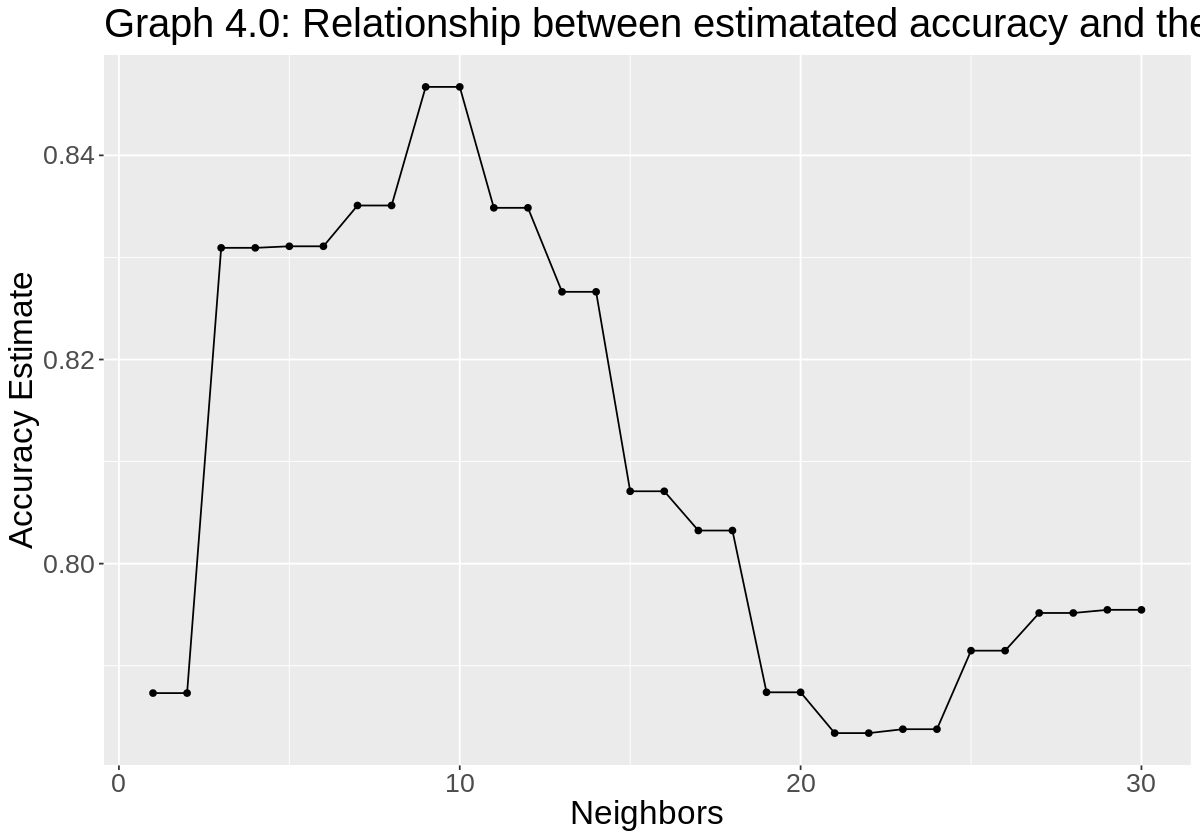

In [18]:
options(repr.plot.width = 10, repr.plot.height = 7)
accuracy_vs_k <- accuracies %>%
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy Estimate") +
                theme(text = element_text(size = 20)) +
                ggtitle("Graph 4.0: Relationship between estimatated accuracy and the number of neighbors")

accuracy_vs_k

<b><center> Graph 4.0: K-neighbors and their accuracy plotted </center></b>

We pull the smalles k-value that gives the highest accuracy indicated in Figure 4.1.

In [19]:
best_k <- accuracies %>%
          filter(mean == max(mean)) %>%
          select(neighbors) %>%
          slice(1) %>%
          pull()
best_k

[1] 9

**Training and Prediction**

We then use the best k-value as the parameter for our model and train it.
Then, predict against the testing set and inspect its accuracy.

In [20]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_fit <- workflow() %>%
            add_recipe(heart_failure_recipe) %>%
            add_model(knn_spec) %>%
            fit(data = heart_failure_train)

predictions <- predict(knn_fit, heart_failure_test) %>%
                bind_cols(heart_failure_test) %>%
                metrics(truth = DEATH_EVENT, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9545455


<b><center> Table 9.0: Accuracy of our Model (k=7) </center></b>

**Prediction Assessment**

We use a confusion matrix to assess our results. 

In [21]:
confusion_mat <- predict(knn_fit, heart_failure_test) %>%
                bind_cols(heart_failure_test) %>%
                    conf_mat(truth = DEATH_EVENT, estimate = .pred_class)
confusion_mat

          Truth
Prediction no yes
       no  30   2
       yes  0  12

<b><center> Table 10.0: Confusion Matrix of our Model (k=7) </center></b>

From the confusion matrix:
- 30 correctly predicted survivors
- 12 correctly predicted deaths
- 2 incorrectly predicted survivors
- 0 incorrectly predicted deaths

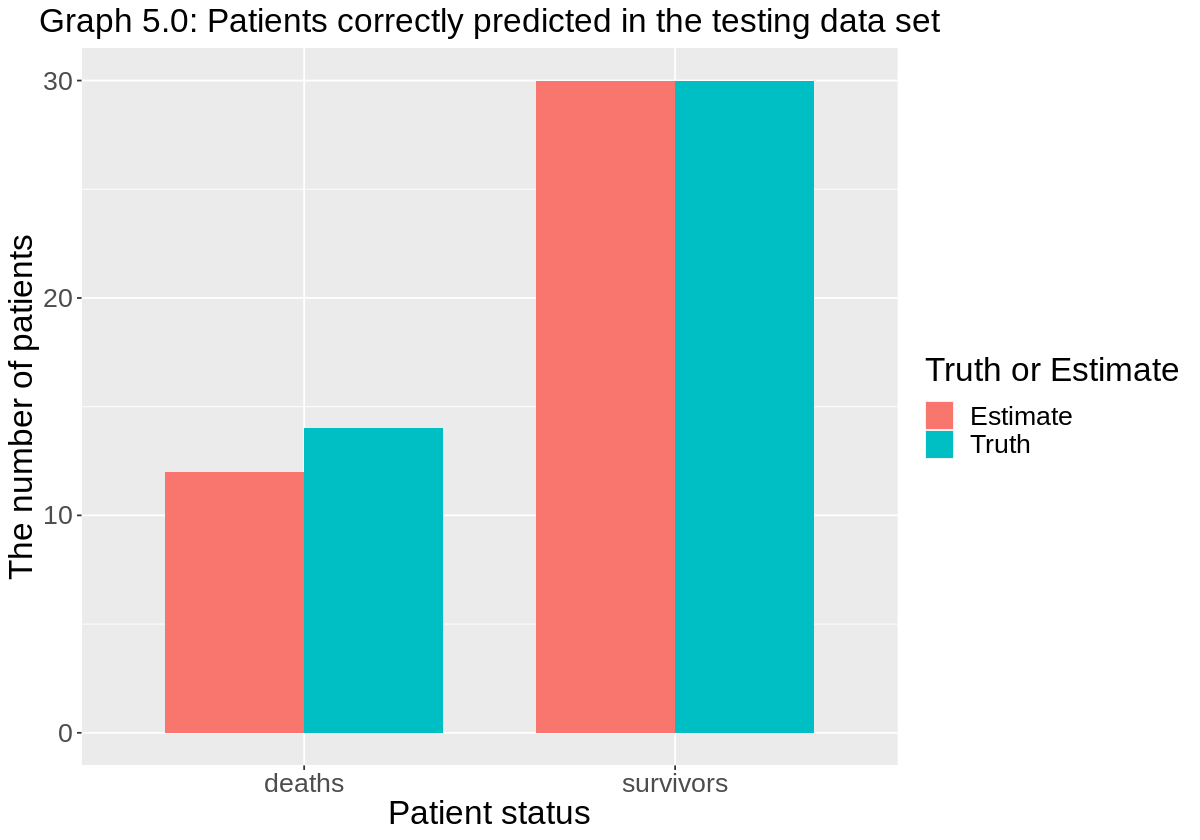

In [22]:
deaths <- 14
predicted_deaths <- 12
survivors <- 30
predicted_survivors <- 30

predictions <- tibble(status = c("deaths", "deaths", "survivors", "survivors"),
                      number_of_patients = c(deaths, predicted_deaths, survivors, predicted_survivors),
                      pred = c("Truth", "Estimate", "Truth", "Estimate"))

prediction_bar <- predictions %>%
                    group_by(status) %>%
                    ggplot(aes(x = status, y = number_of_patients, fill = pred)) +
                    geom_bar(stat = "identity", position = "dodge", width = 0.75) +
                    labs(x = "Patient status", y = "The number of patients", fill = "Truth or Estimate") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Graph 5.0: Patients correctly predicted in the testing data set") +
                    theme(plot.title = element_text(hjust = 0.5, size = 20))
prediction_bar

<b><center> Graph 5.0: Bar graph of patients correctly predicted in the testing data set </center></b>

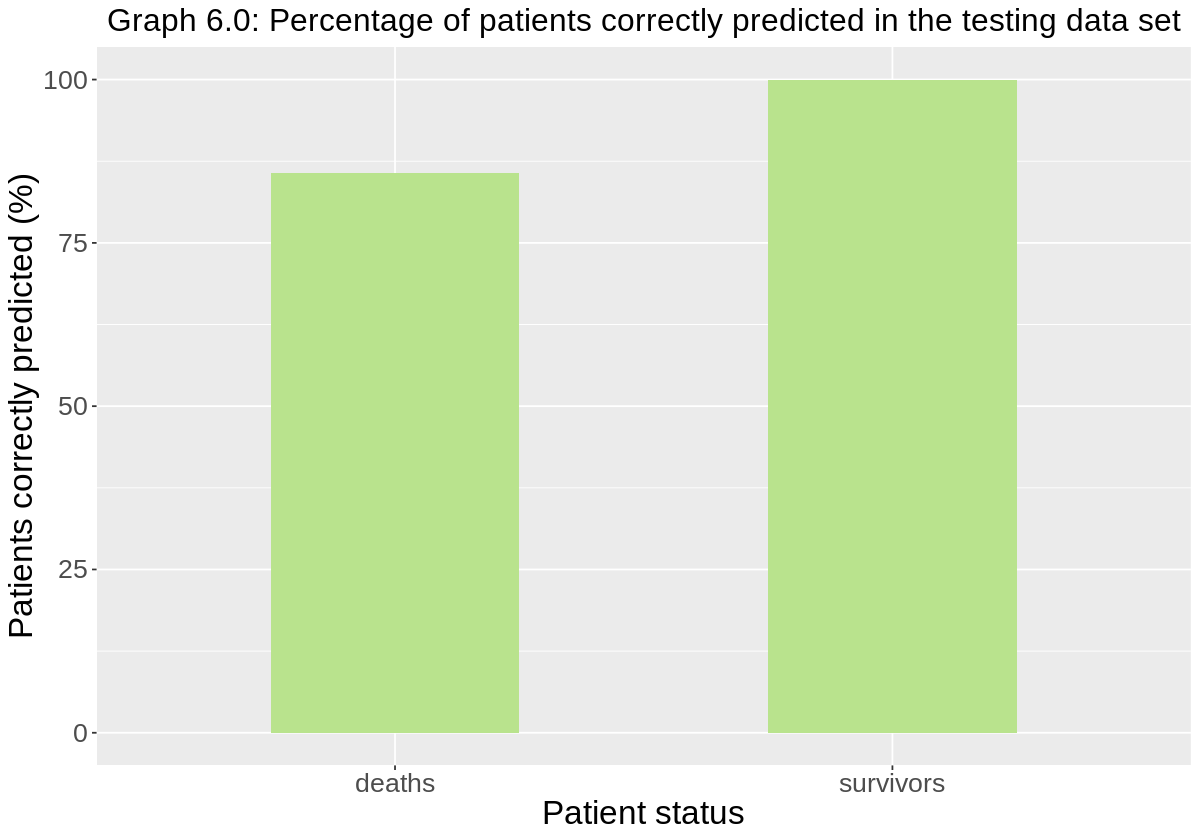

In [23]:
deaths <- 14
predicted_deaths <- 12
survivors <- 30
predicted_survivors <- 30

predictions <- tibble(status = c("deaths", "survivors"),
                      number_of_patients = c((predicted_deaths/deaths)*100, 
                                             (predicted_survivors/survivors)*100))

prediction_bar <- predictions %>%
                    group_by(status) %>%
                    ggplot(aes(x = status, y = number_of_patients)) +
                    geom_bar(stat = "identity", position = "dodge", width = 0.50, fill = "#b9e38d") +
                    labs(x = "Patient status", y = "Patients correctly predicted (%)") +
                    theme(text = element_text(size = 20)) +
                    ggtitle("Graph 6.0: Percentage of patients correctly predicted in the testing data set") +
                    theme(plot.title = element_text(hjust = 0.5, size = 19))
prediction_bar

<b><center> Graph 6.0: Percentage of patients correctly predicted in the testing data set </center></b>

### Methods & Results:


To predict patients' survival, we use an instance-based learning model, the K-Nearest Neighbors classifier. 85% of the data is used for the training set, and the remaining 15% of data for the testing set, which is divided by using the initial_split function. We choose predictors based on our exploratory data analysis (e.g., plots and tables) and forward selection in R to pick the optimum model that balances high accuracy and model simplicity. Preliminary predictors were chosen by observing graphs that clearly show separate groupings of deaths and survivors for given predictors. The forward selection process indicated 85% accuracy can be achieved when using ejection fraction, serum creatinine, and time as the quantitative predictor variables. Using the selected predictors, we created a recipe. Then from the vfold_cv function we performed a 5-fold cross-validation on the training set. Using the training data, we created a workflow analysis from our recipe and model specification with a tuning of K values from 1 to 30. After collecting the metrics from the workflow, we selected the K that gives optimal accuracy shown by a K vs accuracy graph. The K value we choose (7) is not prohibitive and has an accuracy similar to nearby K values. We then trained the KNN model with the training data set. To test the accuracy of our model we predicted the target variable labels for unseen testing data using the predict function. From the confusion matrix on test data we can identify that since the prediction of death is not greatly inaccurate (Graph 5.0), that would make this model applicable for future observations with unknown labels. From the metrics function we filtered the accuracy value and got 95% predicted labels for the testing data were correct. 

### Discussion:
We found that the KNN-model achieved 95% accuracy of predictions on the testing data when the ejection fraction, serum creatinine, and time are used as predictor variables. Since our classification is for medical purposes, it is crucial to analyze the results from the confusion matrix. Only 4.5% of data incorrectly predicted survival when the patient did not. It is always better to have incorrectly predicted that the patient will not survive, compared to when the model incorrectly predicts that the patient will survive. If we underestimate the severity of the patient’s heath then they may not receive appropriate medical attention. On the other hand, if a patient is incorrectly predicted to not survive, they will still get expert diagnosis from medical professionals. Therefore, our small error in predicted survival is a good indication our model can be used by medical experts with improvements in the future by collecting more data for the model. 

The majority classifier would achieve a 68% accuracy. Since our classifier provides a significant improvement compared to the majority classifier, this indicated that our method is extracting some useful information from the predictor variables. 

Our finding matches our expectations because ejection fraction, serum creatinine and medical care provided by doctors are essential factors to consider from the patient’s medical history. 

Ejection fraction (EF) is important to consider because a low EF could cause sudden cardiac arrest (SCA) and cause death within minutes. High amounts of serum creatinine indicate renal dysfunction (kidney failure) and without dialysis treatment, it can cause death. Follow-up clinical period measured how many days of pharmacological treatment, and exercise-based rehabilitation the patient received. If the patient has not received adequate medical treatment for the severity of their health conditions, that could lead to death. 

**Long-term Benefits of this model:**
According to (https://link.springer.com/article/10.1007/s40273-020-00952-0), the annual total medical costs for heart failure patients were estimated at $24,383 per patient, with heart failure-specific hospitalizations costs with a median of \\$15,879 per patient. Substantial medical costs for the treatment of heart failure patients are a crucial reason why detecting patients requiring urgent care is important. Pharmacological treatments, and exercise-based rehabilitation can improve outcomes for patients, particularly those with heart failure with reduced ejection fraction. However, early diagnosis is crucial to allow timely initiation of evidence-based treatments (https://www.bmj.com/content/364/bmj.l223). From the results of our KNN-classification model, medical experts can study the medical records of heart failure patients based on the predictor variables chosen that give high accuracy of predicted outcomes. The success of this model may not only reduce the extortionate medical costs for hardworking families, but it will also accelerate the diagnosis process giving more time for necessary medical attention and improve the effectiveness of medical examinations for future patients. 


Future questions our model could lead to:
- What is the partial impact fraction that could affect our results? (Partial impact fraction quantitates change in the proportion of disease cases if the data is collected for a different population, without changing other prediction factors.)
- What additional information may the doctor need if the predicted outcome is death?
- Can we use our prediction model to predict the survival of patients with other types of cardiovascular diseases?


### References (APA6):
**Source of data - UCI Data:**

Chicco, D. (2020, February 5). Heart failure clinical records Data Set. UCI Machine Learning Repository: Heart Failure Clinical Records Data Set. Retrieved March 2, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records# 

**Literature relevant to the project:**

Chicco, D., & Jurman, G. (2020, February 03). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone - BMC Medical Informatics and decision making. Retrieved March 30, 2022, from https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Taylor, C., Ordóñez-Mena, J., Roalfe, A., Lay-Flurrie, S., Jones, N., Marshall, T., & Hobbs, F. (2019, February 13). Trends in survival after a diagnosis of heart failure in the United Kingdom 2000-2017: Population Based Cohort Study. Retrieved March 30, 2022, from https://www.bmj.com/content/364/bmj.l223

Urbich, M., Globe, G., Pantiri, K., Heisen, M., Bennison, C., Wirtz, H., & Di Tanna, G. (2020, August 19). A systematic review of medical costs associated with heart failure in the USA (2014–2020) - pharmacoeconomics. Retrieved March 30, 2022, from https://link.springer.com/article/10.1007/s40273-020-00952-0
